In [7]:
# Import necessary libraries
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.model_selection import train_test_split


In [8]:
import librosa
import numpy as np
import os

def load_and_preprocess_data(base_path):
    all_spectrograms = []
    all_labels = []
    folders_processed = 0
    errors = []

    for speaker_id in os.listdir(base_path):
        speaker_folder = os.path.join(base_path, speaker_id)
        if os.path.isdir(speaker_folder):
            try:
                for filename in os.listdir(speaker_folder):
                    if filename.endswith('.wav'):
                        file_path = os.path.join(speaker_folder, filename)
                        audio, sr = librosa.load(file_path, sr=None)  # Load with original sample rate
                        try:
                            # Corrected function call
                            spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
                            spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
                            all_spectrograms.append(spectrogram_db)
                            label = int(filename.split('_')[0])
                            all_labels.append(label)
                        except Exception as e:
                            print(f"Error processing file {filename} in folder {speaker_folder}: {e}")
                folders_processed += 1
            except Exception as e:
                errors.append((speaker_id, str(e)))

    print(f"Processed {folders_processed} folders successfully.")
    if errors:
        print("Errors encountered in the following folders:")
        for error in errors:
            print(f"Folder {error[0]}: {error[1]}")

    return np.array(all_spectrograms), np.array(all_labels)

# Set the path to your data directory
base_path = 'C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST'
spectrograms, labels = load_and_preprocess_data(base_path)



Processed 5 folders successfully.


In [9]:
import librosa
import numpy as np
import os

def process_one_file(file_path):
    try:
        # Load an audio file
        audio, sr = librosa.load(file_path, sr=None)
        # Generate a Mel-scaled spectrogram
        spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

        return spectrogram_db
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Specify the path to a single audio file
file_path = 'C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data/01/0_01_0.wav'
spectrogram = process_one_file(file_path)

if spectrogram is not None:
    print("Spectrogram generated successfully.")
else:
    print("Failed to generate spectrogram.")


Spectrogram generated successfully.


In [2]:
import librosa
import numpy as np
import os

def load_and_preprocess_data(base_path, max_pad_length=None):
    all_spectrograms = []
    all_labels = []
    files_processed = 0
    errors = []

    for speaker_id in os.listdir(base_path):
        speaker_folder = os.path.join(base_path, speaker_id)
        if os.path.isdir(speaker_folder):
            for filename in os.listdir(speaker_folder):
                if filename.endswith('.wav'):
                    file_path = os.path.join(speaker_folder, filename)
                    try:
                        audio, sr = librosa.load(file_path, sr=None)
                        spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
                        spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

                        # Padding or truncating each spectrogram slice to have consistent size
                        if max_pad_length:
                            if spectrogram_db.shape[1] > max_pad_length:
                                spectrogram_db = spectrogram_db[:, :max_pad_length]
                            elif spectrogram_db.shape[1] < max_pad_length:
                                pad_width = max_pad_length - spectrogram_db.shape[1]
                                spectrogram_db = np.pad(spectrogram_db, pad_width=((0, 0), (0, pad_width)), mode='constant')

                        all_spectrograms.append(spectrogram_db)
                        label = int(filename.split('_')[0])
                        all_labels.append(label)
                        files_processed += 1
                        print(f"Processed {file_path}")
                    except Exception as e:
                        errors.append(f"Error processing {file_path}: {e}")
                        print(f"Error processing {file_path}: {e}")

    print(f"Total processed files: {files_processed}")
    if errors:
        print(f"Total errors: {len(errors)}")
        for error in errors[:10]:  # Print first 10 errors to avoid too much output
            print(error)

    return np.array(all_spectrograms), np.array(all_labels)

# Set the correct path to your data
base_path = 'C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data'
max_pad_length = 216  # You might need to adjust this based on your data
spectrograms, labels = load_and_preprocess_data(base_path, max_pad_length)

print(f"Generated {len(spectrograms)} spectrograms.")


Processed C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data\01\0_01_0.wav
Processed C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data\01\0_01_1.wav
Processed C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data\01\0_01_10.wav
Processed C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data\01\0_01_11.wav
Processed C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data\01\0_01_12.wav
Processed C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data\01\0_01_13.wav
Processed C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data\01\0_01_14.wav
Processed C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data\01\0_01_15.wav
Processed C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data\01\0_01_16.wav
Processed C:/Users/heelt/Downl

KeyboardInterrupt: 

C:\Users\heelt\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 199s 263ms/step - accuracy: 0.7908 - loss: 5.3098 - val_accuracy: 0.9822 - val_loss: 0.0613
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 198s 264ms/step - accuracy: 0.9792 - loss: 0.0711 - val_accuracy: 0.9873 - val_loss: 0.0483
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 207s 276ms/step - accuracy: 0.9856 - loss: 0.0481 - val_accuracy: 0.9902 - val_loss: 0.0373
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 215s 287ms/step - accuracy: 0.9933 - loss: 0.0215 - val_accuracy: 0.9885 - val_loss: 0.0449
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 201s 268ms/step - accuracy: 0.9914 - loss: 0.0282 - val_accuracy: 0.9923 - val_loss: 0.0291
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 199s 265ms/step - accuracy: 0.9936 - loss: 0.0191 - val_accuracy: 0.9907 - val_loss: 0.0324
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 198s 263ms/step - accuracy: 0.9931 - loss: 0.0210 - val_accuracy: 0.9767 - val_loss: 0.0792
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 183s 243ms/step - accuracy: 0.9895 -

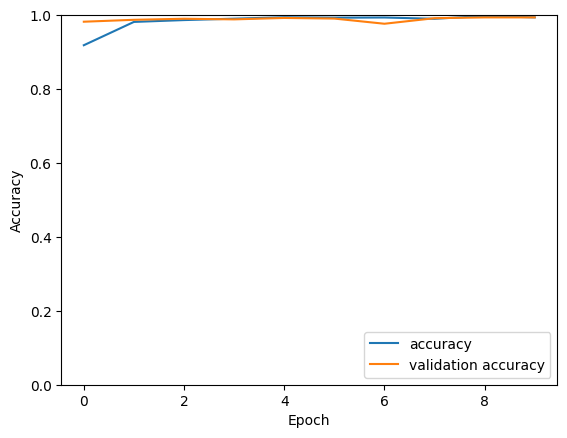

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Assuming 'spectrograms' and 'labels' are your datasets
X_train, X_test, y_train, y_test = train_test_split(spectrograms, labels, test_size=0.2, random_state=42)

# Building a simple CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming you have 10 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


In [21]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")


188/188 - 9s - 46ms/step - accuracy: 0.9938 - loss: 0.0236
Test accuracy: 0.9938333630561829, Test loss: 0.02362487092614174


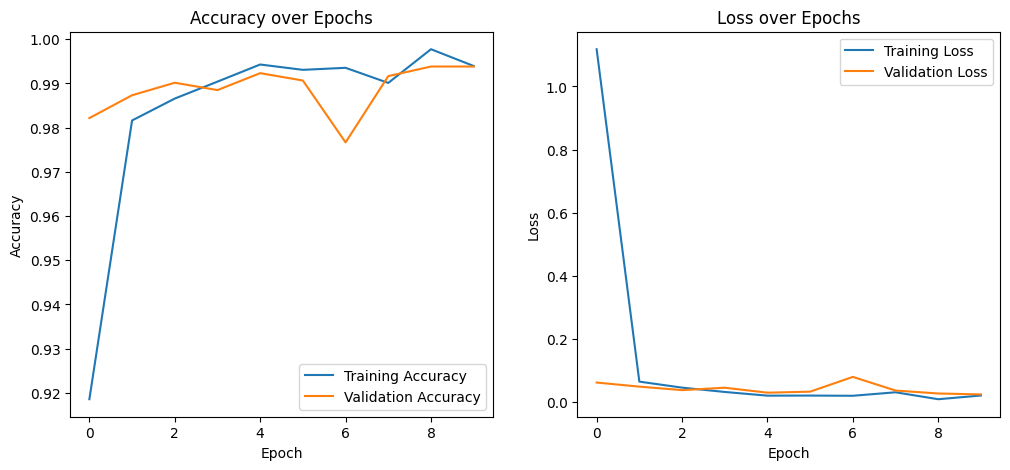

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step


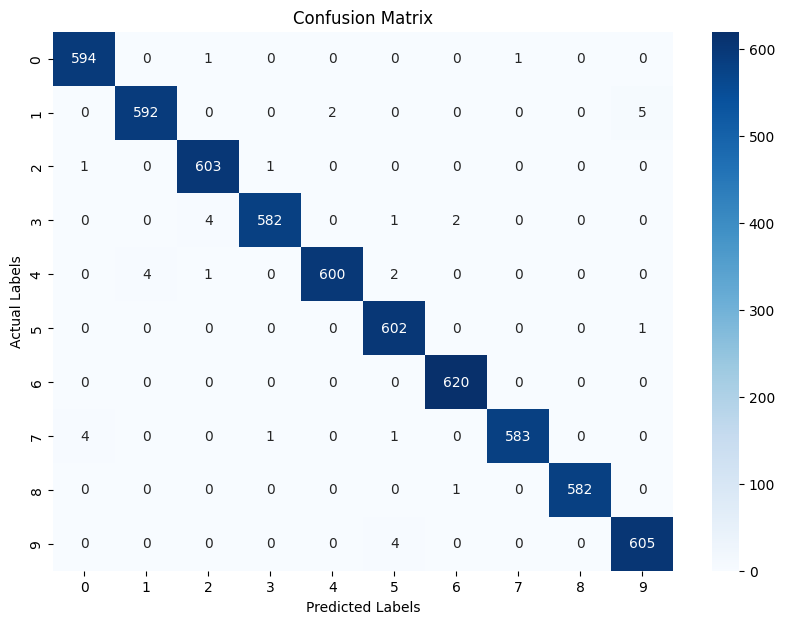

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       596
           1       0.99      0.99      0.99       599
           2       0.99      1.00      0.99       605
           3       1.00      0.99      0.99       589
           4       1.00      0.99      0.99       607
           5       0.99      1.00      0.99       603
           6       1.00      1.00      1.00       620
           7       1.00      0.99      0.99       589
           8       1.00      1.00      1.00       583
           9       0.99      0.99      0.99       609

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict classes with the model
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Detailed classification report
print(classification_report(y_test, predicted_classes))


In [31]:
import tensorflow as tf
from tensorflow import keras


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with respect to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [4]:
import librosa
import numpy as np
import os

def load_and_preprocess_data(base_path, max_pad_length=None):
    all_spectrograms = []
    all_labels = []
    files_processed = 0
    errors = []

    for speaker_id in os.listdir(base_path):
        speaker_folder = os.path.join(base_path, speaker_id)
        if not os.path.isdir(speaker_folder):
            continue
        for filename in os.listdir(speaker_folder):
            if not filename.endswith('.wav'):
                continue
            file_path = os.path.join(speaker_folder, filename)
            try:
                audio, sr = librosa.load(file_path, sr=None)  # Ensure librosa can handle the file format
                spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)
                spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

                if max_pad_length:
                    if spectrogram_db.shape[1] > max_pad_length:
                        spectrogram_db = spectrogram_db[:, :max_pad_length]
                    elif spectrogram_db.shape[1] < max_pad_length:
                        pad_width = max_pad_length - spectrogram_db.shape[1]
                        spectrogram_db = np.pad(spectrogram_db, pad_width=((0, 0), (0, pad_width)), mode='constant')

                all_spectrograms.append(spectrogram_db)
                label = int(filename.split('_')[0])
                all_labels.append(label)
                files_processed += 1
                print(f"Processed {file_path}")
            except Exception as e:
                errors.append(f"Error processing {file_path}: {e}")
                print(f"Error processing {file_path}: {e}")

    print(f"Total processed files: {files_processed}")
    if errors:
        print(f"Total errors: {len(errors)}")
        for error in errors[:10]:  # Print first 10 errors to avoid too much output
            print(error)

    return np.array(all_spectrograms), np.array(all_labels)

# Set the correct path to your data
base_path = 'C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data'
max_pad_length = 216
spectrograms, labels = load_and_preprocess_data(base_path, max_pad_length)
print(f"Generated {len(spectrograms)} spectrograms.")


Processed C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data\01\0_01_0.wav
Processed C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data\01\0_01_1.wav
Processed C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data\01\0_01_10.wav
Processed C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data\01\0_01_11.wav
Processed C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data\01\0_01_12.wav
Processed C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data\01\0_01_13.wav
Processed C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data\01\0_01_14.wav
Processed C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data\01\0_01_15.wav
Processed C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data\01\0_01_16.wav
Processed C:/Users/heelt/Downl

KeyboardInterrupt: 

In [6]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the data loading function
def load_and_preprocess_data(base_path, max_pad_length=None):
    all_spectrograms = []
    all_labels = []
    files_processed = 0
    errors = []

    for speaker_id in os.listdir(base_path):
        speaker_folder = os.path.join(base_path, speaker_id)
        if not os.path.isdir(speaker_folder):
            continue
        for filename in os.listdir(speaker_folder):
            if filename.endswith('.wav'):
                file_path = os.path.join(speaker_folder, filename)
                try:
                    audio, sr = librosa.load(file_path, sr=None)
                    spectrogram = librosa.feature.melspectrogram(audio, sr=sr, n_mels=128)
                    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

                    if max_pad_length:
                        if spectrogram_db.shape[1] > max_pad_length:
                            spectrogram_db = spectrogram_db[:, :max_pad_length]
                        elif spectrogram_db.shape[1] < max_pad_length:
                            pad_width = max_pad_length - spectrogram_db.shape[1]
                            spectrogram_db = np.pad(spectrogram_db, pad_width=((0, 0), (0, pad_width)), mode='constant')

                    all_spectrograms.append(spectrogram_db)
                    label = int(filename.split('_')[0])
                    all_labels.append(label)
                    files_processed += 1

                except Exception as e:
                    errors.append(f"Error processing {file_path}: {e}")

    print(f"Total processed files: {files_processed}")
    if errors:
        print(f"Errors encountered in {len(errors)} files.")
        for error in errors[:10]:
            print(error)

    return np.array(all_spectrograms), np.array(all_labels)

# Path to your data and parameter for max padding length
base_path = 'C:/Users/heelt/Downloads/cs 770 assignment/cs770 project/myproject/AudioMNIST/data'
max_pad_length = 216
spectrograms, labels = load_and_preprocess_data(base_path, max_pad_length)

# Plotting the first spectrogram
def plot_spectrogram(spectrogram, title="Spectrogram", figsize=(10, 4)):
    plt.figure(figsize=figsize)
    plt.imshow(spectrogram, aspect='auto', origin='lower', cmap='viridis')
    plt.title(title)
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time bins')
    plt.ylabel('Frequency bins')
    plt.tight_layout()
    plt.show()

# Check if spectrograms were loaded and plot the first one
if spectrograms.size > 0:
    plot_spectrogram(spectrograms[0], title="Spectrogram of the First Audio Sample")
else:
    print("No spectrograms to display.")


KeyboardInterrupt: 